# Vytvoření vizualizace z více sérií

Nyní vytvoříme graf pro prezentaci výsledků. Můžeme např. zkombinovat čárový a sloupcový graf, kde čárový graf obsahuje plán tržeb a sloupcový skutečné tržby. Po prvním příkazu uložíme výsledek do proměnné `ax`. Metoda `.plot()` totiž vrací odkaz na vygenerovaný graf, abychom do něj mohli přidávat další data nebo jej dále upravovat. Ve druhém příkazu zadáme parametr `ax` a vložíme mu jako hodnotu graf `ax`. Tím říkáme, aby modul nevytvářel nový graf, ale vložil druhý (čárový) graf k prvnímu (sloupcovému).

Budeme potřebovat data [sales_actual.csv](sales_actual.csv) a [sales_plan.csv](sales_plan.csv), která jsme používali už v první lekci.

In [3]:
import pandas

# Tento kód je z minulé lekce
df_plan = pandas.read_csv("sales_plan.csv")
df_plan["sales_plan_cumsum"] = df_plan.groupby("year")["sales"].cumsum()
df_actual = pandas.read_csv("sales_actual.csv")
df_actual = df_actual.sort_values("date")
df_actual["date"] = pandas.to_datetime(df_actual["date"])
df_actual["month"] = df_actual["date"].dt.month
df_actual["year"] = df_actual["date"].dt.year
df_actual_grouped = df_actual.groupby(["year", "month"]).sum(numeric_only=True)
df_actual_grouped["sales_actual_cumsum"] = df_actual_grouped.groupby("year")["contract_value"].cumsum()
df_merged = pandas.merge(df_plan, df_actual_grouped, on=["month", "year"])

year = 2022
df_merged_plot = df_merged[df_merged["year"] == year]
df_merged_plot = df_merged_plot.reset_index()
df_merged_plot.head()

,index,year,month,sales,sales_plan_cumsum,contract_value,sales_actual_cumsum
0,12,2022,1,12000000.0,12000000.0,9798565.4,9798565.4
1,13,2022,2,9000000.0,21000000.0,11314932.2,21113497.6
2,14,2022,3,9000000.0,30000000.0,13173404.4,34286902.0
3,15,2022,4,11000000.0,41000000.0,12718895.8,47005797.8
4,16,2022,5,11000000.0,52000000.0,9546852.9,56552650.7


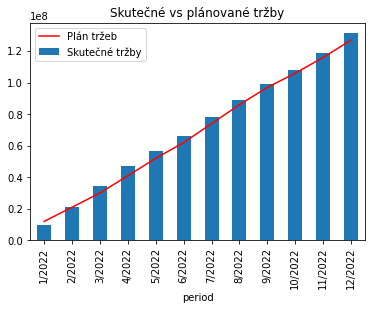

In [17]:
import matplotlib.pyplot as plt

# Sloupcový graf skutečných tržeb
ax = df_merged_plot["sales_plan_cumsum"].plot(color="red", title="Skutečné vs plánované tržby")
# Čárový graf plánovaných tržeb
df_merged_plot["sales_actual_cumsum"].plot(kind="bar", ax=ax)
# Popisky pro legendu grafu
plt.legend(['Plán tržeb', "Skutečné tržby"])

Z popisků osy X ale není jasné, jakého období se týká. Provo v tabulce vytvoříme sloupec, který bude označovat časové období a bude obsahovat číslo měsíce a rok (např. `1/2022`). Abychom si následně usnadnili vytvoření grafu, nastavíme tento sloupec jako index. K tomu využijeme metodu `set_index()`.

In [5]:
# Přidáme nový sloupec
df_merged_plot["period"] = df_merged_plot["month"].astype(str) + "/" + df_merged_plot["year"].astype(str)
# Nastavíme index
df_merged_plot = df_merged_plot.set_index("period")
df_merged_plot.head()

,index,year,month,sales,sales_plan_cumsum,contract_value,sales_actual_cumsum
period,,,,,,,
1/2022,12,2022,1,12000000.0,12000000.0,9798565.4,9798565.4
2/2022,13,2022,2,9000000.0,21000000.0,11314932.2,21113497.6
3/2022,14,2022,3,9000000.0,30000000.0,13173404.4,34286902.0
4/2022,15,2022,4,11000000.0,41000000.0,12718895.8,47005797.8
5/2022,16,2022,5,11000000.0,52000000.0,9546852.9,56552650.7


Text(0.5, 0, 'Období')

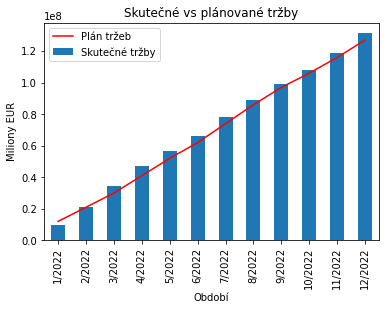

In [6]:
ax = df_merged_plot["sales_plan_cumsum"].plot(color="red", title="Skutečné vs plánované tržby")
df_merged_plot["sales_actual_cumsum"].plot(kind="bar", ax=ax)
plt.legend(['Plán tržeb', "Skutečné tržby"])
plt.ylabel("Miliony EUR")
plt.xlabel("Období")